In [3]:
import pandas as pd

In [120]:
sim_auc1 = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/simulated_ss2000_var0.5_nsim200_bp_annotations_withGeneData_EGAD.csv")
sim_auc0 = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad/simulated_ss2000_var0_nsim200_bp_annotations_withGeneData_EGAD.csv")


In [121]:
bulk = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkEGADPipeline/data/splitOPs1/EGAD/melted_dfs/Brain_split.csv_melted_EGADs.csv.gz", index_col=0)

In [122]:
bulk_auc = bulk.groupby('index').mean()

In [123]:
top_performers = bulk_auc.sort_values('auc', ascending=False).head(int(bulk_auc.shape[0]/5))
rest_performers = bulk_auc.sort_values('auc', ascending=False).tail(int(bulk_auc.shape[0]*4/5))

In [124]:
sim_top1 = sim_auc1[sim_auc1.index.isin(top_performers.index)]
sim_top0 = sim_auc0[sim_auc0.index.isin(top_performers.index)]

sim_rest1 = sim_auc1[sim_auc1.index.isin(rest_performers.index)]
sim_rest0 = sim_auc0[sim_auc0.index.isin(rest_performers.index)]

In [125]:
sim_top1.auc.mean()

0.5566092475799119

In [126]:
sim_top0.auc.mean()

0.4917615715631262

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


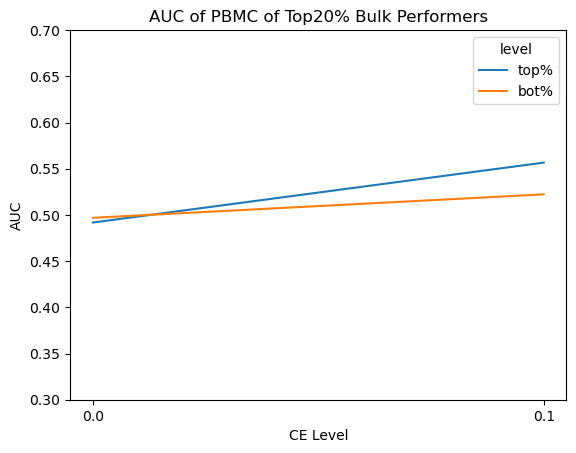

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'auc': [sim_top0.auc.mean(), sim_top1.auc.mean(), sim_rest0.auc.mean(), sim_rest1.auc.mean()],
                   'CE': [0, 0.1, 0, 0.1],
                   'level': ['top%', 'top%', 'bot%', 'bot%']})

# Create a line plot with different colors for each 'level'
sns.lineplot(x='CE', y='auc', hue='level', data=df)

# Add labels and title
plt.xlabel('CE Level')
plt.ylabel('AUC')
plt.title('AUC of PBMC of Top20% Bulk Performers')

# Set y-axis range
plt.ylim(0.3, 0.7)

# Set x-axis ticks to be the unique values of 'CE'
plt.xticks(df['CE'].unique())

# Show the plot
plt.show()


In [128]:
merged0 = rest_performers.merge(sim_auc0, left_index = True, right_index = True)
auc0_cor = merged0['auc_x'].corr(merged0['auc_y'])
auc0_cor

-0.0043942035287718876

In [129]:

merged0_top = top_performers.merge(sim_auc0, left_index = True, right_index = True)
auc0_cor_top = merged0_top['auc_x'].corr(merged0_top['auc_y'])
auc0_cor_top

0.17807327602454157

In [130]:

merged1 = rest_performers.merge(sim_auc1, left_index = True, right_index = True)
auc1_cor = merged1['auc_x'].corr(merged1['auc_y'])
auc1_cor

0.13822612604264786

In [131]:
merged1_top = top_performers.merge(sim_auc1, left_index = True, right_index = True)
auc1_cor = merged1_top['auc_x'].corr(merged1_top['auc_y'])
auc1_cor

0.18001578872079785

In [132]:
bulk_auc

,bootstrap,auc
index,,
GO:0000045,500.5,0.533385
GO:0000070,500.5,0.622184
GO:0000077,500.5,0.532863
GO:0000079,500.5,0.530116
GO:0000082,500.5,0.498722
...,...,...
GO:2001237,500.5,0.506879
GO:2001238,500.5,0.682347
GO:2001240,500.5,0.558035


In [133]:
merged1

,bootstrap,auc_x,auc_y,avg_node_degree,degree_null_auc
GO:1900026,500.5,0.652852,0.461052,510.470002,0.553024
GO:0043536,500.5,0.652722,0.481690,173.088697,0.569599
GO:0007042,500.5,0.652323,0.526599,1148.917379,0.499897
GO:0034620,500.5,0.651540,0.510909,1158.335465,0.423272
GO:0007616,500.5,0.651320,0.447561,1077.594805,0.493520
...,...,...,...,...,...
GO:0001678,500.5,0.433204,0.295872,1027.962642,0.468468
GO:0006259,500.5,0.431612,0.673137,1405.311654,0.541153
GO:0050908,500.5,0.427486,0.481661,1318.072763,0.442389
GO:0002092,500.5,0.419130,0.444586,417.803494,0.550181


(0.2, 1.0)

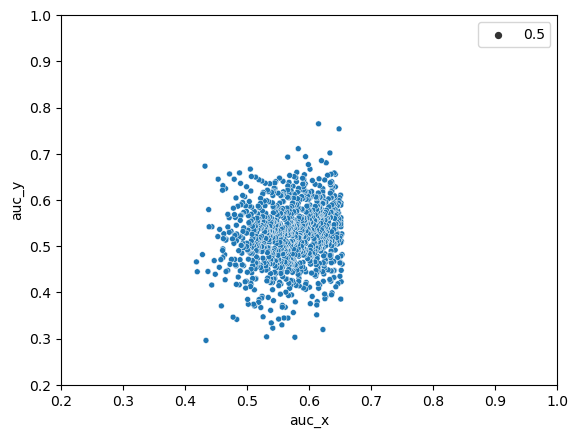

In [134]:
sns.scatterplot(data =merged1, x = 'auc_x', y = 'auc_y', size=0.5)

plt.xlim([0.2,1])
plt.ylim([0.2,1])

(0.2, 1.0)

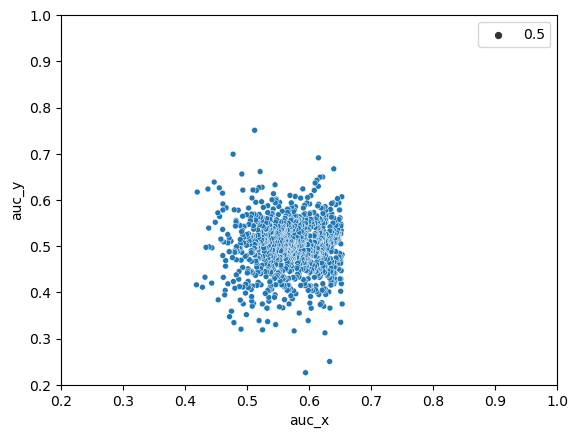

In [135]:
sns.scatterplot(data =merged0, x = 'auc_x', y = 'auc_y', size=0.5)

plt.xlim([0.2,1])
plt.ylim([0.2,1])

(0.2, 1.0)

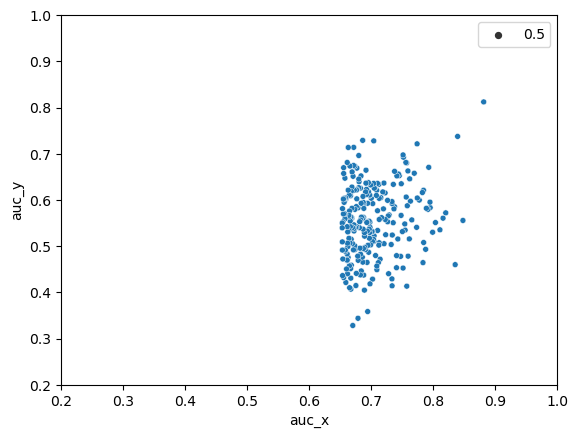

In [136]:
sns.scatterplot(data =merged1_top, x = 'auc_x', y = 'auc_y', size=0.5)

plt.xlim([0.2,1])
plt.ylim([0.2,1])

In [137]:
bp_GO = pd.read_csv('/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessGO_pipe/ontologyPropagation/BPcuratedAllRegex.csv', sep = ",")

    

In [161]:
cta_sim1 = sim_auc1.merge(bp_GO, left_index=True, right_on='ID')

In [162]:
cta_sim1_0 = cta_sim1.merge(sim_auc0, left_on='ID', right_index=True)

In [163]:
cta_sim1_0.rename(columns = {'auc_x': 'CE1', 'auc_y':"CE0"}, inplace = True)

In [164]:
cta_melted = cta_sim1_0.melt(id_vars = ['ID','CTAffiliation'], value_vars=['CE0', 'CE1'])

In [165]:
cta_melted['CTAffiliation'] = cta_melted['CTAffiliation'].astype(str)

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


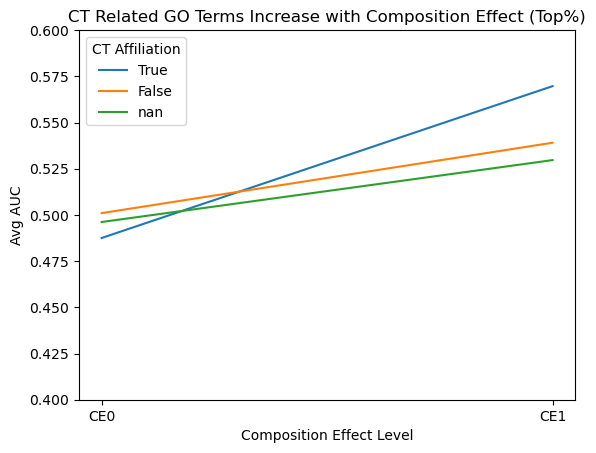

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cta_melted' is your DataFrame
# You may need to replace 'variable', 'value', and 'CTAffiliation' with your actual column names

# Create a line plot without error shading
sns.lineplot(data=cta_melted, x='variable', y='value', hue='CTAffiliation', errorbar=None)

# Customize x-axis ticks
plt.xticks([0, 1])
plt.ylim([0.4, 0.6])

# Add axis titles and legend
plt.xlabel('Composition Effect Level')
plt.ylabel('Avg AUC')
plt.title('CT Related GO Terms Increase with Composition Effect (Top%)')
plt.legend(title='CT Affiliation')

# Show the plot
plt.show()


In [155]:
bp_GO[bp_GO.ID.isin(top_performers.index)].value_counts("CTAffiliation")

CTAffiliation
True     166
False     68
Name: count, dtype: int64

In [160]:
bp_GO = bp_GO[bp_GO.ID.isin(top_performers.index)]

In [170]:
sim_profiles = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulationOneProfile/data/boot_run2/master_melted_df.csv.gz", index_col=0)

In [183]:
sim_profiles = sim_profiles[sim_profiles.organism_part == "exp_pbmc_sc_with_metadata_pc_cell_type_profiles_.csv" ]
sim_profiles = sim_profiles[sim_profiles.variance == 0.05 ]

In [189]:
profile_performance = sim_profiles.groupby('index')['auc'].mean()

In [206]:
merged_per = pd.merge(left = profile_performance, right = sim_auc1, left_index=True, right_index=True)

In [207]:
merged_per = merged_per.rename(columns = {'auc_x': "CTProfileSimBulk", 'auc_y': "SimBulk"})

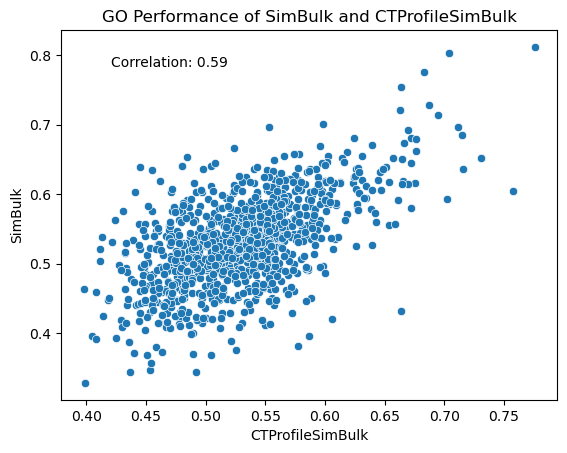

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'sim_profiles' is your DataFrame
# Replace 'index' with your actual column names


# Create a scatter plot with correlation value
sns.scatterplot(data=merged_per, x='CTProfileSimBulk', y='SimBulk')

# Calculate and display the correlation value
correlation_value = merged_per['CTProfileSimBulk'].corr(merged_per['SimBulk'])
plt.text(0.1, 0.9, f'Correlation: {correlation_value:.2f}', transform=plt.gca().transAxes)

# Add axis titles
plt.xlabel('CTProfileSimBulk')
plt.ylabel('SimBulk')

# Add a title for the entire plot
plt.title('GO Performance of SimBulk and CTProfileSimBulk')

# Show the plot
plt.show()


In [203]:
sim_auc1

,auc,avg_node_degree,degree_null_auc
GO:0002250,0.620817,487.398336,0.280356
GO:0007166,0.628296,690.237145,0.351934
GO:0045087,0.574657,897.481982,0.469814
GO:0009617,0.636820,418.403320,0.319513
GO:0006955,0.550634,734.412861,0.359294
...,...,...,...
GO:0051697,0.732162,1875.251307,0.622468
GO:0000768,0.671267,501.786230,0.324050
GO:0036444,0.620597,-197.279691,0.563107
GO:1990108,0.443529,1976.558489,0.663016
